In [1]:
# Standard library imports
from glob import glob
from multiprocessing import Pool, cpu_count
import subprocess
import os

# Third-party imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras


In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

data_folder = 'validate/'

def display_sample_images(data_folder, samples_per_class=2):
    classes = sorted(os.listdir(data_folder))
    fig, axes = plt.subplots(max(len(classes), 1), samples_per_class, figsize=(10, max(4*len(classes), 1)))
    if len(classes) * samples_per_class == 1:
        axes = np.array([[axes]])
    elif len(classes) == 1 or samples_per_class == 1:
        axes = np.expand_dims(axes, axis=0 if len(classes) > 1 else 1)
    
    for i, cls in enumerate(classes):
        cls_folder = os.path.join(data_folder, cls)
        image_files = [img for img in sorted(os.listdir(cls_folder)) if img.lower().endswith(('.png', '.jpg', '.jpeg'))][:samples_per_class]
        for j, image_file in enumerate(image_files):
            if len(image_files) == 0:  # Skip if no image files
                continue
            img_path = os.path.join(cls_folder, image_file)
            img = Image.open(img_path).convert('RGB')
            ax = axes[i, j] if len(classes) > 1 and samples_per_class > 1 else axes[max(i, j)]
            ax.imshow(img)
            ax.set_title(cls)
            ax.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(data_folder)



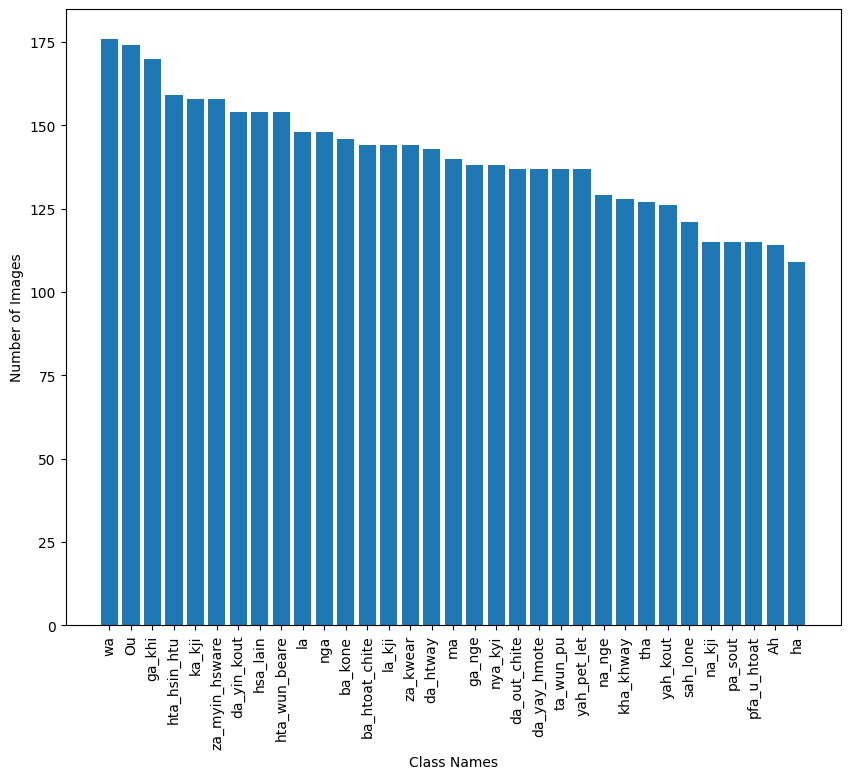

In [3]:
from glob import glob
import os
import matplotlib.pyplot as plt

data_folder = 'validate'
classes = sorted(os.listdir(data_folder))  # Sort to ensure consistent order

class_image_counts = {}

for class_name in classes:
    # This now accounts for multiple image formats and uses os.path.join for path construction
    image_paths = []
    for ext in ('*.jpg', '*.png', '*.jpeg'):
        image_paths.extend(glob(os.path.join(data_folder, class_name, ext)))
    class_image_counts[class_name] = len(image_paths)

# Sorting classes by count to make the plot more informative
sorted_counts = {k: v for k, v in sorted(class_image_counts.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_counts)), list(sorted_counts.values()), align='center')
plt.xticks(range(len(sorted_counts)), list(sorted_counts.keys()), rotation='vertical')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.show()


In [4]:
print("Number of images per class:")
# Sorting the classes by count to make the output more informative
sorted_counts = sorted(class_image_counts.items(), key=lambda item: item[1], reverse=True)

for class_name, count in sorted_counts:
    print(f"Class {class_name}: {count}")


Number of images per class:
Class wa: 176
Class Ou: 174
Class ga_khi: 170
Class hta_hsin_htu: 159
Class ka_kji: 158
Class za_myin_hsware: 158
Class da_yin_kout: 154
Class hsa_lain: 154
Class hta_wun_beare: 154
Class la: 148
Class nga: 148
Class ba_kone: 146
Class ba_htoat_chite: 144
Class la_kji: 144
Class za_kwear: 144
Class da_htway: 143
Class ma: 140
Class ga_nge: 138
Class nya_kyi: 138
Class da_out_chite: 137
Class da_yay_hmote: 137
Class ta_wun_pu: 137
Class yah_pet_let: 137
Class na_nge: 129
Class kha_khway: 128
Class tha: 127
Class yah_kout: 126
Class sah_lone: 121
Class na_kji: 115
Class pa_sout: 115
Class pfa_u_htoat: 115
Class Ah: 114
Class ha: 109


In [ ]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

def display_image_from_class(data_folder, class_name, image_index=None):
    image_files = glob(f"{data_folder}/{class_name}/*.jpg")
    if not image_files:
        print(f"No images found for class '{class_name}'.")
        return
    
    # Dynamically select an image if no specific index is provided
    selected_image = image_files[image_index if image_index is not None else 0]
    
    # Load and convert the image
    img = cv2.imread(selected_image)
    if img is None:
        print(f"Failed to load image {selected_image}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(img_rgb)
    plt.title(f'Sample Image - {class_name}')
    plt.axis('off')
    plt.show()

# Example usage
data_folder = 'validate'
class_name = 'Ah'  # Example class
display_image_from_class(data_folder, class_name)


# 1. Visualize More Images


In [6]:
labels = sorted(os.listdir(data_folder))


print(labels)


['Ah', 'Ou', 'ba_htoat_chite', 'ba_kone', 'da_htway', 'da_out_chite', 'da_yay_hmote', 'da_yin_kout', 'ga_khi', 'ga_nge', 'ha', 'hsa_lain', 'hta_hsin_htu', 'hta_wun_beare', 'ka_kji', 'kha_khway', 'la', 'la_kji', 'ma', 'na_kji', 'na_nge', 'nga', 'nya_kyi', 'pa_sout', 'pfa_u_htoat', 'sah_lone', 'ta_wun_pu', 'tha', 'wa', 'yah_kout', 'yah_pet_let', 'za_kwear', 'za_myin_hsware']


# 2. Image Sizes Distribution

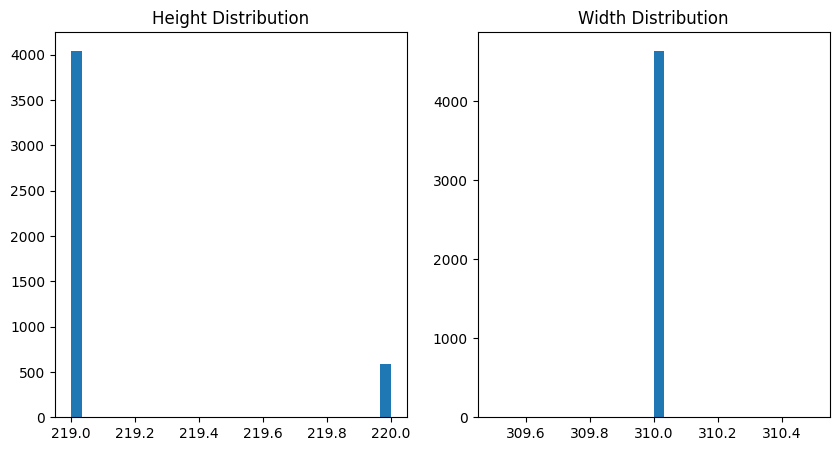

In [7]:
image_sizes = []
for label in labels:
    image_paths = glob(f"{data_folder}/{label}/*.jpg")
    for path in image_paths:
        img = cv2.imread(path)
        image_sizes.append(img.shape[:2])

heights, widths = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=30)
plt.title('Height Distribution')
plt.subplot(1, 2, 2)
plt.hist(widths, bins=30)
plt.title('Width Distribution')
plt.show()


# 3. Pixel Intensity Distribution

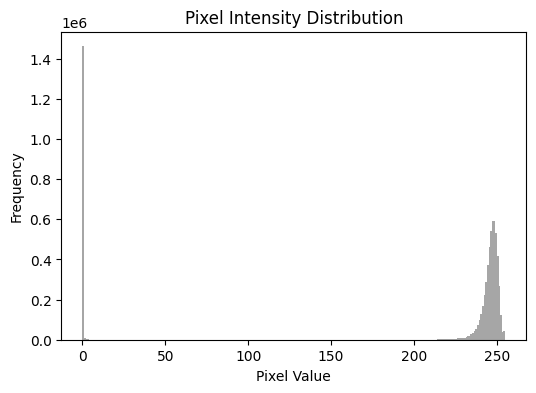

In [8]:
def plot_pixel_intensity_distribution():
    sample_paths = np.random.choice(glob(f"{data_folder}/*/*.jpg"), 100)
    intensities = []
    for path in sample_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        intensities.extend(img.ravel())

    plt.figure(figsize=(6, 4))
    plt.hist(intensities, bins=256, color='gray', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_intensity_distribution()


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height, img_width = 220, 310  # Adjust based on your EDA findings
batch_size = 32  # Adjust based on your system's capabilities

# Training ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=10,  # Random rotations between -10 to 10 degrees
    width_shift_range=0.1,  # Fraction of total width for horizontal shift
    height_shift_range=0.1,  # Fraction of total height for vertical shift
    shear_range=0.1,  # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.1,  # Range for random zoom
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Validation ImageDataGenerator (No augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Point to the directory where your training data is located
train_generator = train_datagen.flow_from_directory(
    'validate/',  # This is the source directory for training images
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Since we have multiple classes to categorize
    shuffle=True
)

# Similarly, point to the directory for validation data
validation_generator = validation_datagen.flow_from_directory(
    'validate/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 4637 images belonging to 33 classes.
Found 4637 images belonging to 33 classes.


# Call Backs

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max'
)

earlystop = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=3, 
    verbose=1, 
    mode='min', 
    min_lr=0.00001
)

callbacks = [checkpoint, earlystop, reduce_lr]


In [11]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Ah': 0, 'Ou': 1, 'ba_htoat_chite': 2, 'ba_kone': 3, 'da_htway': 4, 'da_out_chite': 5, 'da_yay_hmote': 6, 'da_yin_kout': 7, 'ga_khi': 8, 'ga_nge': 9, 'ha': 10, 'hsa_lain': 11, 'hta_hsin_htu': 12, 'hta_wun_beare': 13, 'ka_kji': 14, 'kha_khway': 15, 'la': 16, 'la_kji': 17, 'ma': 18, 'na_kji': 19, 'na_nge': 20, 'nga': 21, 'nya_kyi': 22, 'pa_sout': 23, 'pfa_u_htoat': 24, 'sah_lone': 25, 'ta_wun_pu': 26, 'tha': 27, 'wa': 28, 'yah_kout': 29, 'yah_pet_let': 30, 'za_kwear': 31, 'za_myin_hsware': 32}
{'Ah': 0, 'Ou': 1, 'ba_htoat_chite': 2, 'ba_kone': 3, 'da_htway': 4, 'da_out_chite': 5, 'da_yay_hmote': 6, 'da_yin_kout': 7, 'ga_khi': 8, 'ga_nge': 9, 'ha': 10, 'hsa_lain': 11, 'hta_hsin_htu': 12, 'hta_wun_beare': 13, 'ka_kji': 14, 'kha_khway': 15, 'la': 16, 'la_kji': 17, 'ma': 18, 'na_kji': 19, 'na_nge': 20, 'nga': 21, 'nya_kyi': 22, 'pa_sout': 23, 'pfa_u_htoat': 24, 'sah_lone': 25, 'ta_wun_pu': 26, 'tha': 27, 'wa': 28, 'yah_kout': 29, 'yah_pet_let': 30, 'za_kwear': 31, 'za_myin_hsware': 32}


# Custom CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

from tensorflow.keras.layers import BatchNormalization

def build_custom_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


# Define input shape and number of classes
input_shape = (img_height, img_width, 3)  # Assuming 3 channels (RGB), or 1 channel Black and white
num_classes = len(labels)

# Build the model
model = build_custom_cnn(input_shape, num_classes)


In [17]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 308, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 109, 154, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 107, 152, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 76, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 51, 74, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 37, 128)      

In [18]:
from tensorflow.keras.utils import plot_model

# Assuming your model is stored in a variable called 'model'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
epochs = 50  # You can adjust this based on model performance

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


In [20]:
model.save('my_Cpcnn_model.h5')


In [21]:
from tensorflow.keras.models import load_model

model = load_model('my_Cpcnn_model.h5')


In [ ]:
test_loss, test_accuracy = model.evaluate(train_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, generator):
    # Get the true class labels
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    
    # Predict from generator (returns probabilities)
    pred = model.predict(generator, steps=len(generator), verbose=1)
    # Convert probabilities to class indices
    pred_classes = np.argmax(pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Note: To use this function, make sure 'shuffle=False' in your validation generator.
plot_confusion_matrix(model, validation_generator)


In [ ]:
epochs = 25  # You can adjust this based on model performance

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


In [27]:
model.save('my_Cpcnn_model2.h5')

In [28]:
from tensorflow.keras.models import load_model

model = load_model('my_Cpcnn_model.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(train_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, generator):
    # Get the true class labels
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    
    # Predict from generator (returns probabilities)
    pred = model.predict(generator, steps=len(generator), verbose=1)
    # Convert probabilities to class indices
    pred_classes = np.argmax(pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Note: To use this function, make sure 'shuffle=False' in your validation generator.
plot_confusion_matrix(model, validation_generator)


In [32]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(lr=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 308, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 109, 154, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 107, 152, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 76, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 51, 74, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 37, 128)      

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_height, img_width = 220, 310  # Adjust based on your EDA findings
batch_size = 32  # Adjust based on your system's capabilities

# Training ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=10,  # Random rotations between -10 to 10 degrees
    width_shift_range=0.1,  # Fraction of total width for horizontal shift
    height_shift_range=0.1,  # Fraction of total height for vertical shift
    shear_range=0.1,  # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.1,  # Range for random zoom
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Validation ImageDataGenerator (No augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Point to the directory where your training data is located
train_generator = train_datagen.flow_from_directory(
    'validate/',  # This is the source directory for training images
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Since we have multiple classes to categorize
    shuffle=True
)

# Similarly, point to the directory for validation data
validation_generator = validation_datagen.flow_from_directory(
    'validate/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 4769 images belonging to 33 classes.
Found 4769 images belonging to 33 classes.


In [ ]:
epochs = 25  # You can adjust this based on model performance

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


In [35]:
model.save('my_Cpcnn_model3.h5')

In [ ]:
epochs = 1  # You can adjust this based on model performance

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


In [37]:
model.save('my_Cpcnn_model3half.h5')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, generator):
    # Get the true class labels
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    
    # Predict from generator (returns probabilities)
    pred = model.predict(generator, steps=len(generator), verbose=1)
    # Convert probabilities to class indices
    pred_classes = np.argmax(pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Note: To use this function, make sure 'shuffle=False' in your validation generator.
plot_confusion_matrix(model, validation_generator)
